## Online Shopping Intention Analysis with Python

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [4]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

### Now let’s apply the K-elbow method to determine the number of clustering groups:

In [11]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
               random_state = 0, algorithm = 'lloyd', tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

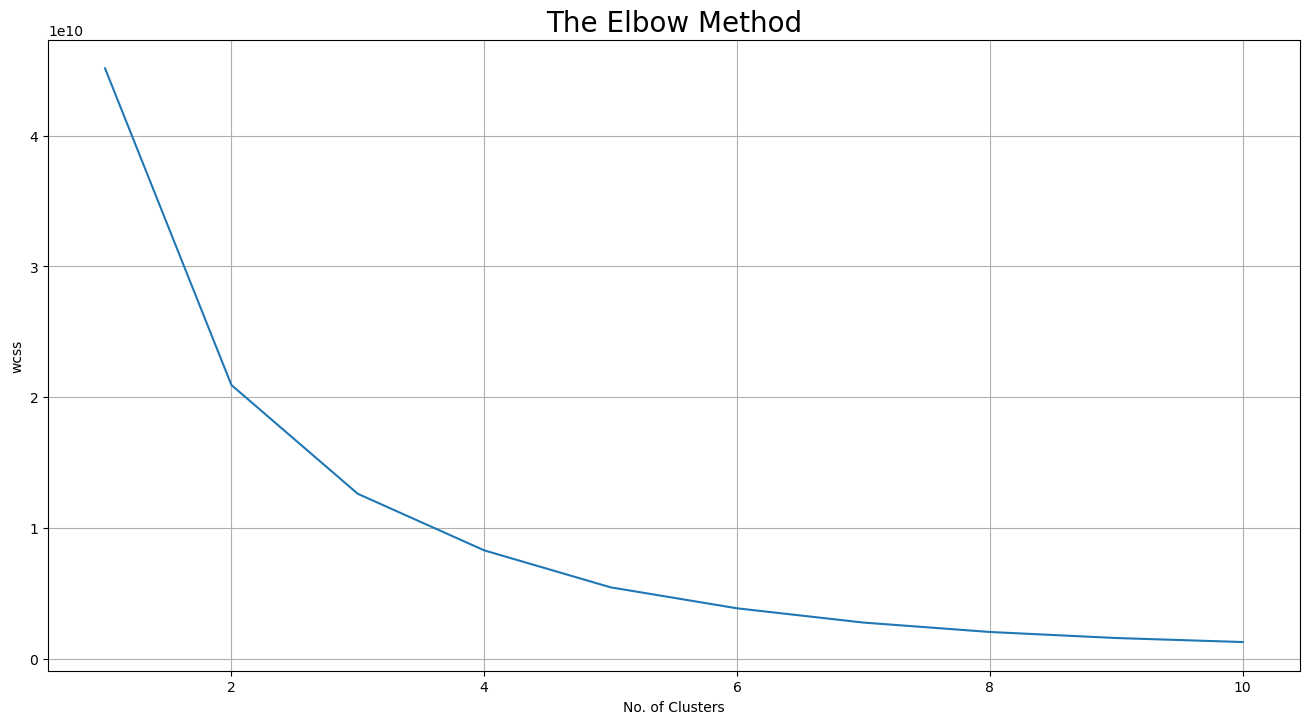

In [12]:
plt.rcParams['figure.figsize'] = (13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# K-Means Clustering

In [14]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10,
           random_state = 0)
y_means = km.fit_predict(x)

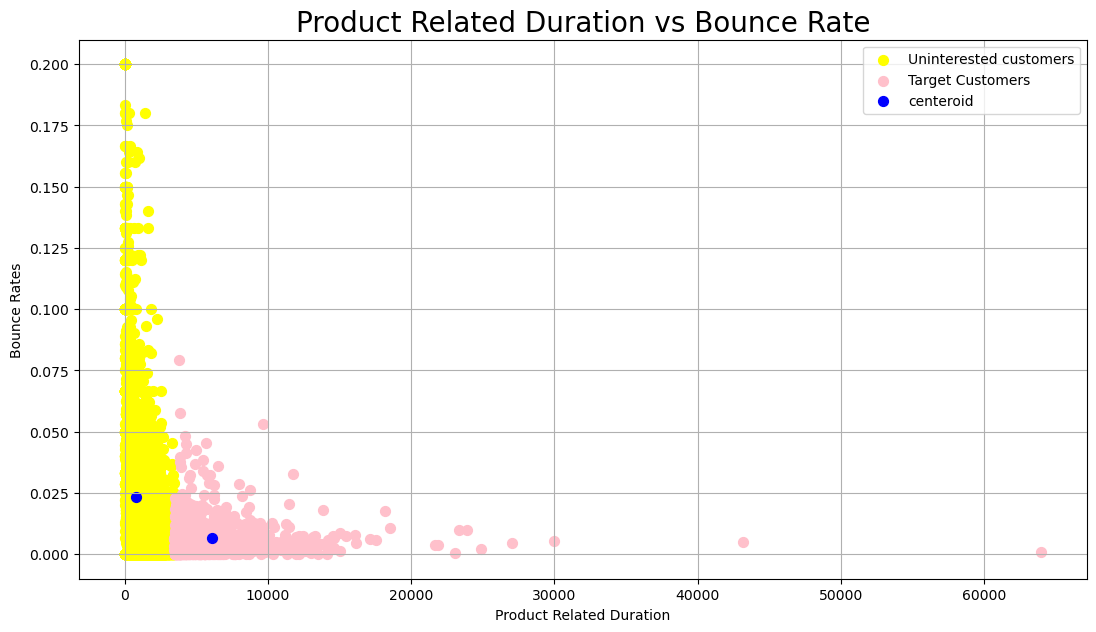

In [16]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c= 'yellow',
           label = 'Uninterested customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink',
           label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50,
           c = 'blue', label = 'centeroid')

plt.title('Product Related Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

In [18]:
# get predicted  clustering result label
labels_pred = y_means

In [19]:
# Print adjusted rand index, which measure the similarity of the two assignments

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print('Adjusted rand index: ')
print(score)

Adjusted rand index: 
0.08359442469281096


In [22]:
! pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


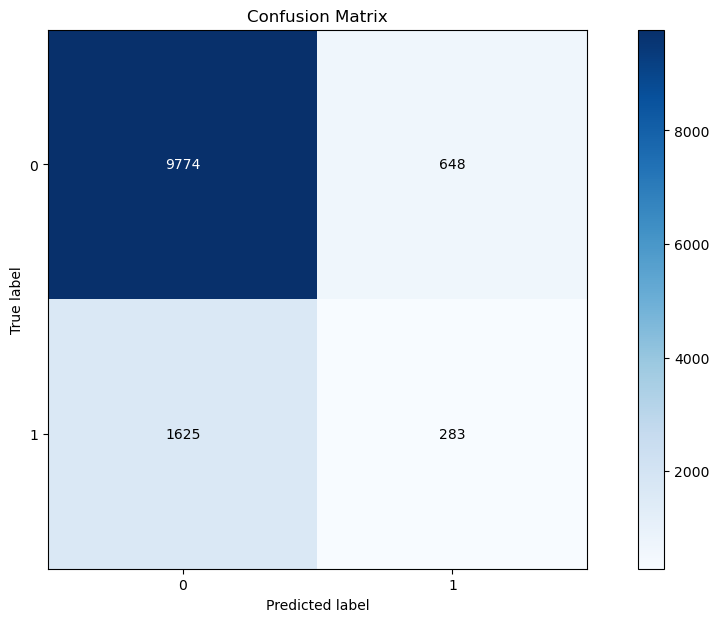

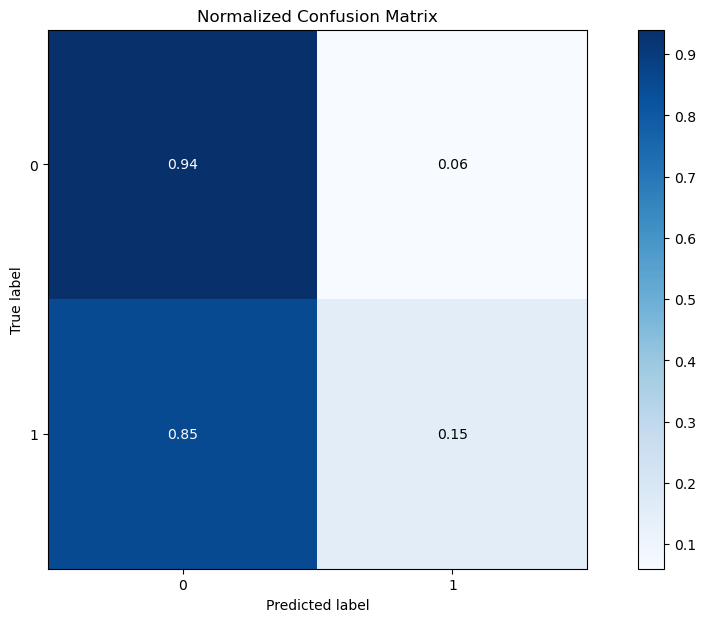

In [23]:
# print confusion matrix

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize = False)
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize = True)

# For streamlit

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import scikitplot as skplt

# Load data
@st.cache
def load_data():
    return pd.read_csv('online_shoppers_intention.csv')

data = load_data()

# Sidebar - Select features
st.sidebar.title('Select Features')
feature1 = st.sidebar.selectbox('Select first feature:', data.columns[5:])
feature2 = st.sidebar.selectbox('Select second feature:', data.columns[6:])

x = data[[feature1, feature2]].values

# Clustering
st.subheader('Clustering Analysis')

# Elbow Method
st.write('### Elbow Method')
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
               random_state = 0, algorithm = 'auto', tol = 0.001)
    km.fit(x)
    wcss.append(km.inertia_)

st.line_chart(wcss)

# Scatter Plot
st.write('### Scatter Plot')
num_clusters = st.slider('Number of Clusters:', min_value=2, max_value=10, value=2)
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(x[y_means == cluster, 0], x[y_means == cluster, 1], s=50, label=f'Cluster {cluster}')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'{feature1} vs {feature2}')
plt.legend()
st.pyplot(plt)

# Evaluation
st.subheader('Evaluation')

# Encode labels
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])
labels_pred = y_means

# Adjusted Rand Index
st.write('### Adjusted Rand Index')
adjusted_rand_index = metrics.adjusted_rand_score(labels_true, labels_pred)
st.write(f'Adjusted Rand Index: {adjusted_rand_index}')

# Confusion Matrix
st.write('### Confusion Matrix')
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
st.pyplot(plt_1)

plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)
st.pyplot(plt_2)


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix



# Load data

def load_data():
    return pd.read_csv('online_shoppers_intention.csv')

data = load_data()

# Sidebar - Select features
st.sidebar.title('Select Features')
feature1 = st.sidebar.selectbox('Select first feature:', data.columns[5:])
feature2 = st.sidebar.selectbox('Select second feature:', data.columns[6:])

x = data[[feature1, feature2]].values

# Clustering
st.subheader('Clustering Analysis')

# Elbow Method
st.write('### Elbow Method')
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
               random_state = 0, algorithm = 'lloyd', tol = 0.001)
    km.fit(x)
    wcss.append(km.inertia_)

st.line_chart(wcss)

# Scatter Plot
st.write('### Scatter Plot')
num_clusters = st.slider('Number of Clusters:', min_value=2, max_value=10, value=2)
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(x[y_means == cluster, 0], x[y_means == cluster, 1], s=50, label=f'Cluster {cluster}')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'{feature1} vs {feature2}')
plt.legend()
st.pyplot(plt)

# Evaluation
st.subheader('Evaluation')

# Encode labels
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])
labels_pred = y_means

# Adjusted Rand Index
st.write('### Adjusted Rand Index')
adjusted_rand_index = metrics.adjusted_rand_score(labels_true, labels_pred)
st.write(f'Adjusted Rand Index: {adjusted_rand_index}')


# Confusion Matrix
cm = confusion_matrix(labels_true, labels_pred)

st.write('### Confusion Matrix')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Pass the current plt.figure() object to st.pyplot()
st.pyplot(plt.gcf())


# Confusion Matrix
cm = confusion_matrix(labels_true, labels_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

st.write('### Confusion Matrix')
plt.figure(figsize=(8, 6))

# Plot normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')

# Pass the current plt.figure() object to st.pyplot()
st.pyplot(plt.gcf())
